In [3]:
import glob
import librosa
import numpy as np
import scipy as sp
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [28]:
ipd.Audio('data/sample-000007.mp3')

# load one audio

In [24]:
audio_path = 'data/sample-000007.mp3'
sr = 44100  #sample rate
signal, sr = librosa.load(audio_path, sr=sr)

# load several audios

In [25]:
def get_signals(path):
    audios_path = glob.glob(path + "/*.mp3")
    results = [librosa.load(audio) for audio in audios_path]
    return results

# plot waveform

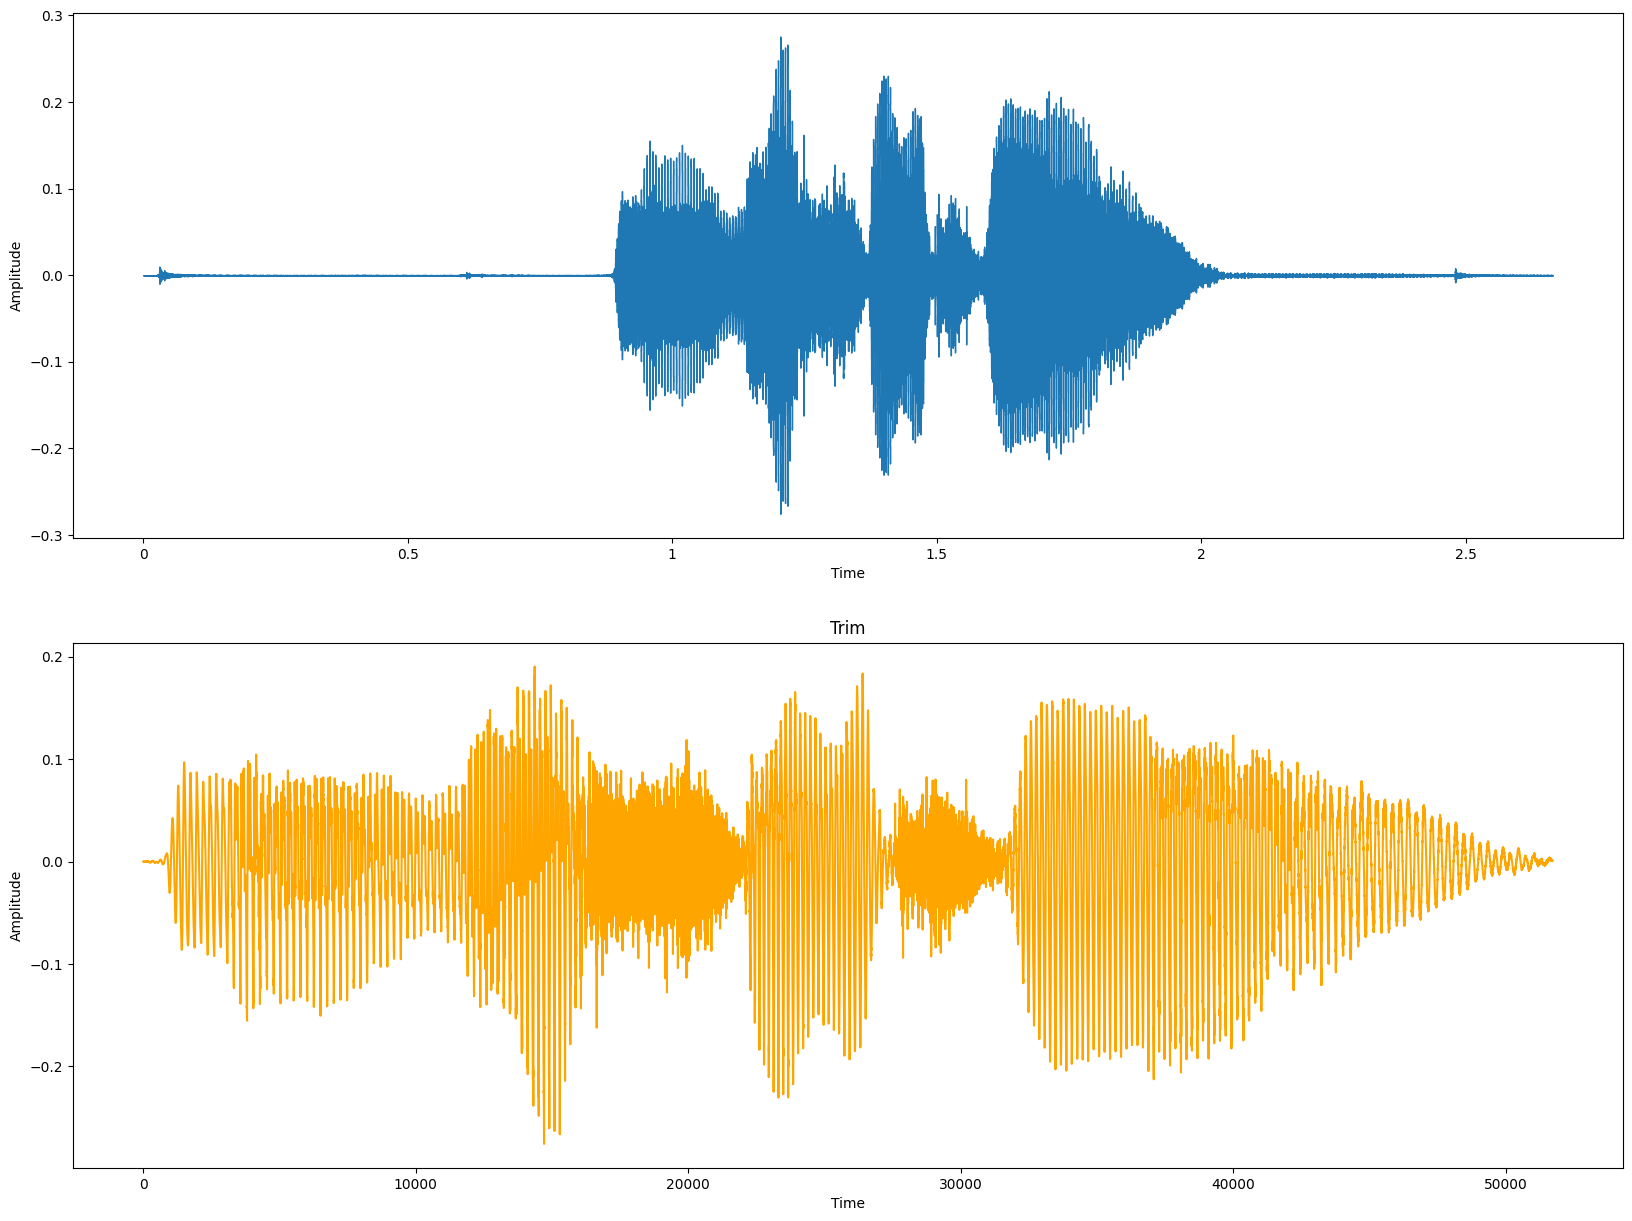

In [27]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y=signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
# Trim leading and trailing silence from an audio signal
signal_trim, _ = librosa.effects.trim(signal, top_db=30)
plt.plot(signal_trim, color='orange')
plt.title('Trim')
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.show()

# FFT

In [29]:
fft = sp.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

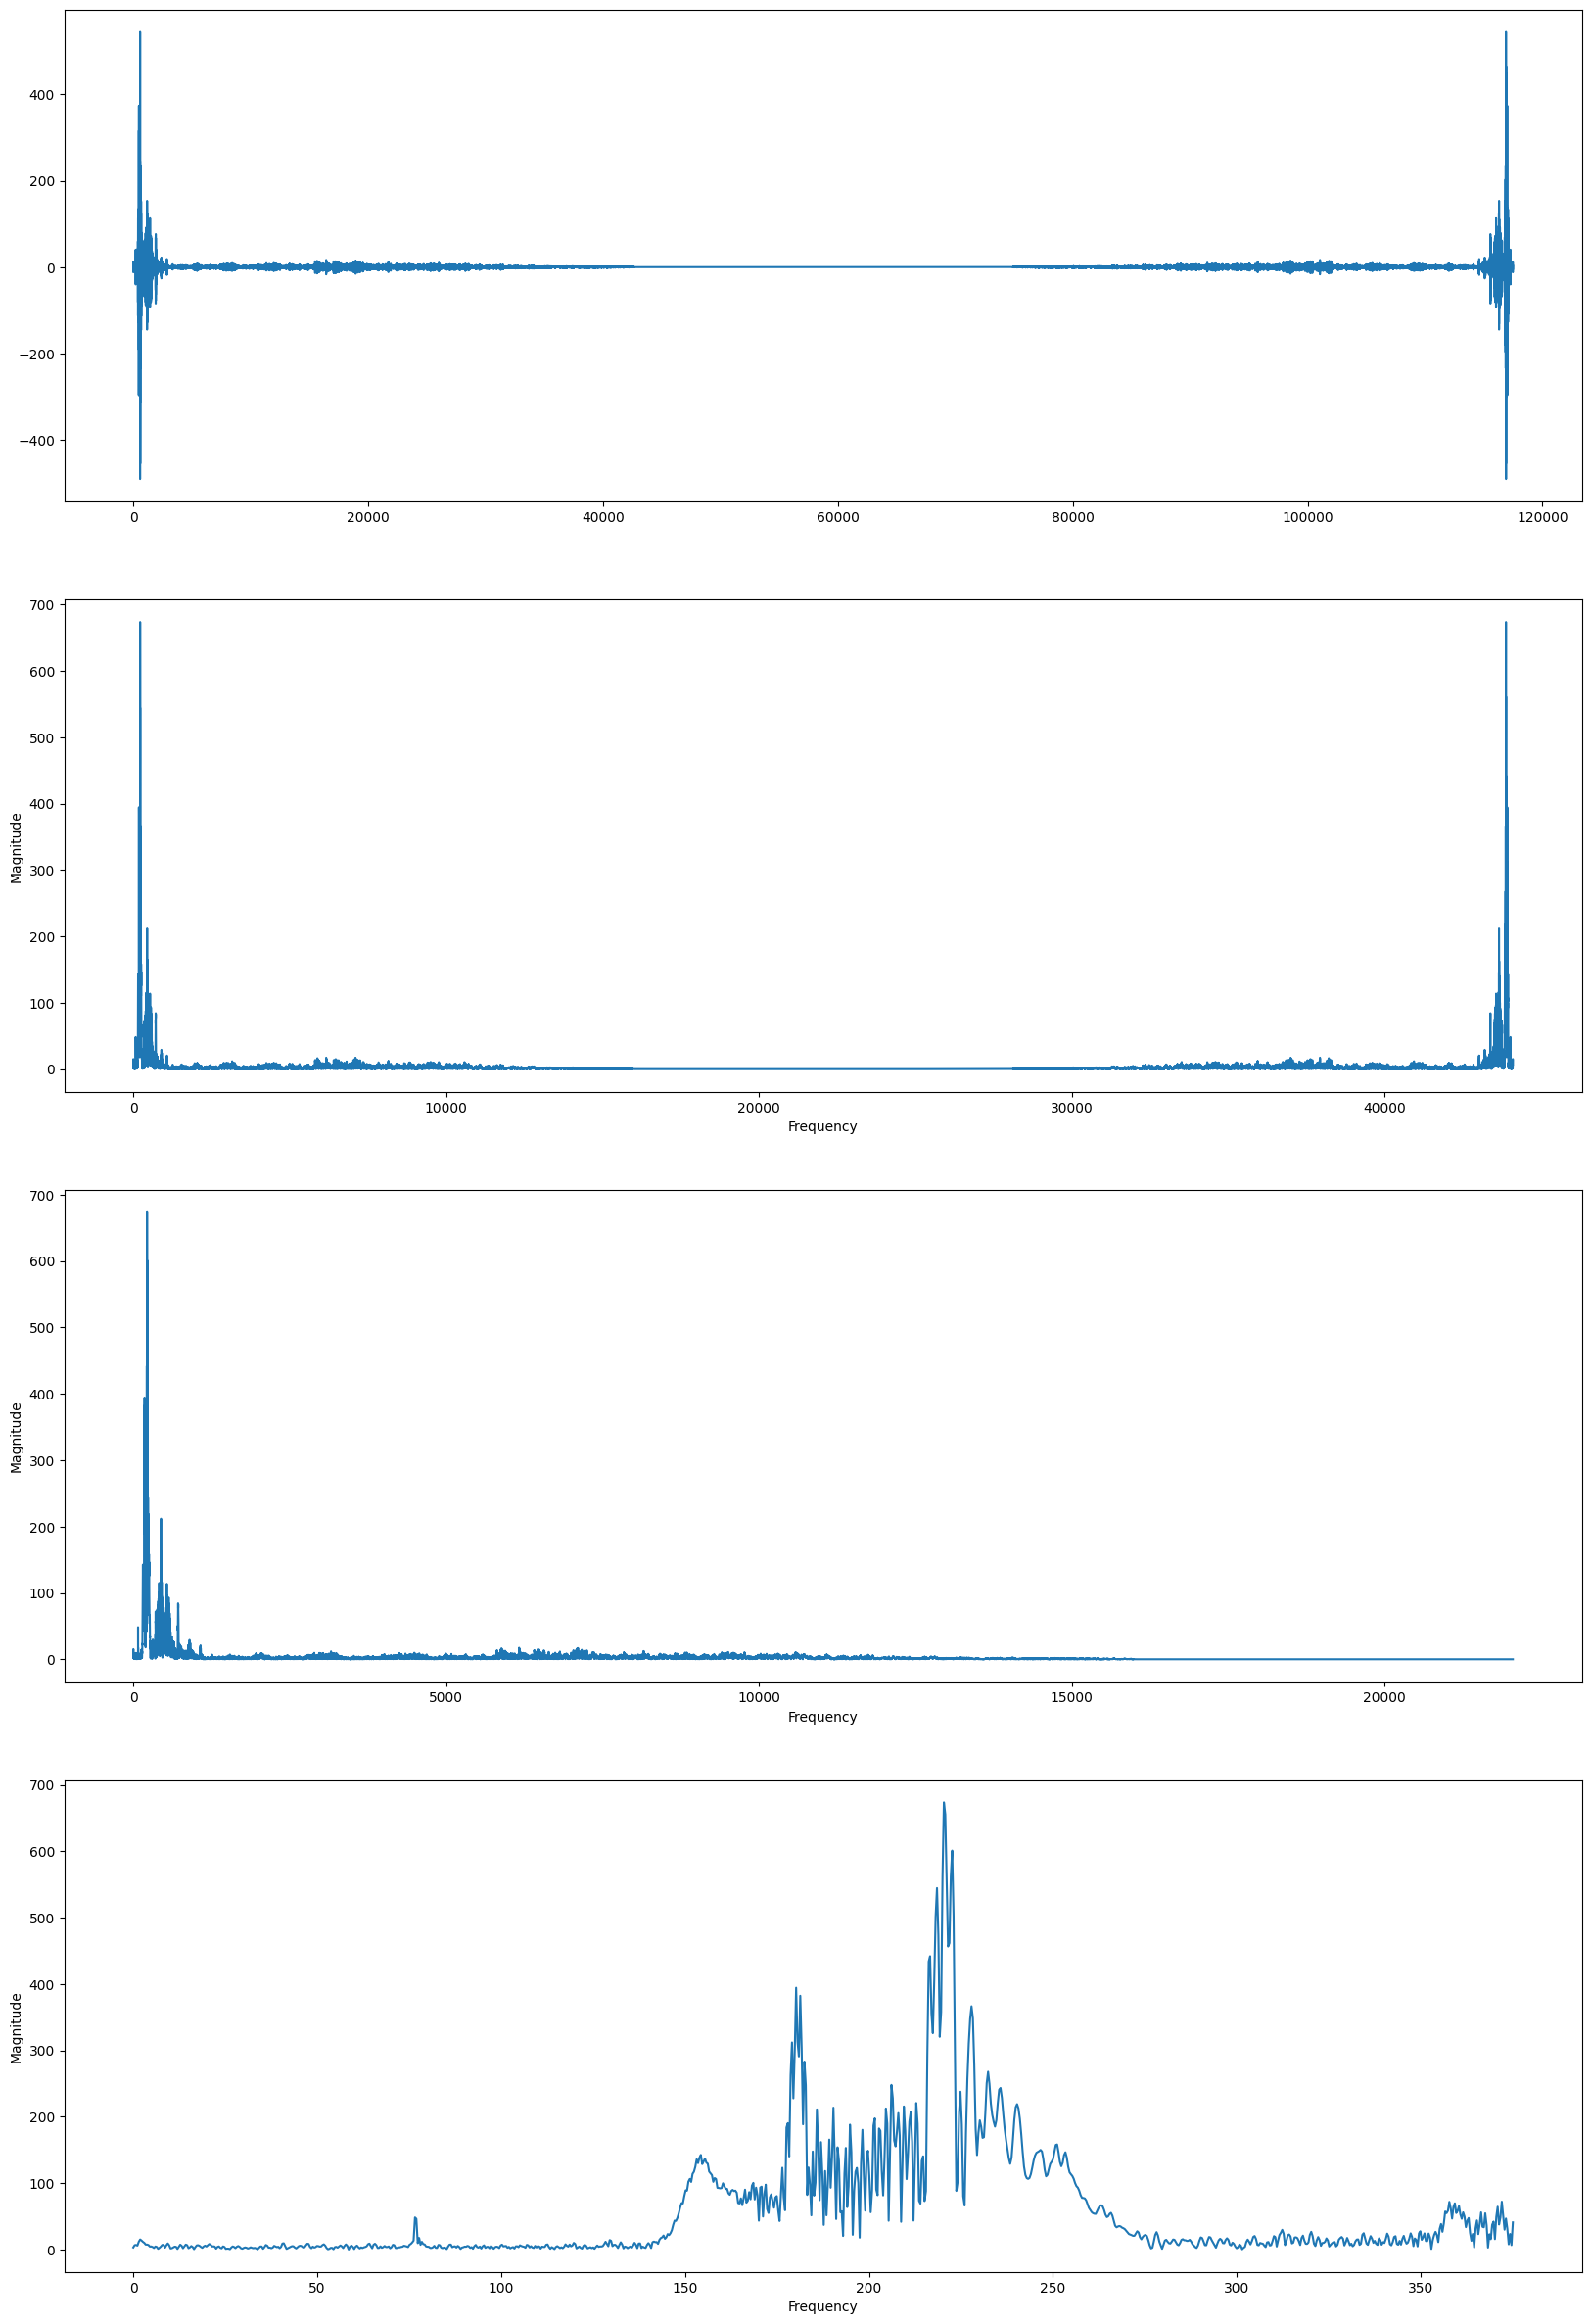

In [31]:
fig = plt.figure(figsize=(20, 30))
r, c = 4, 1

fig.add_subplot(r, c, 1)
plt.plot(fft)

fig.add_subplot(r, c, 2)
plt.plot(frequency, magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

fig.add_subplot(r, c, 3)
plt.plot(frequency[:int(len(frequency) / 2)], magnitude[:int(len(magnitude) / 2)])
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

fig.add_subplot(r, c, 4)
plt.plot(frequency[:1000], magnitude[:1000])
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.show()

# Example Of Superimposing Pure Signals

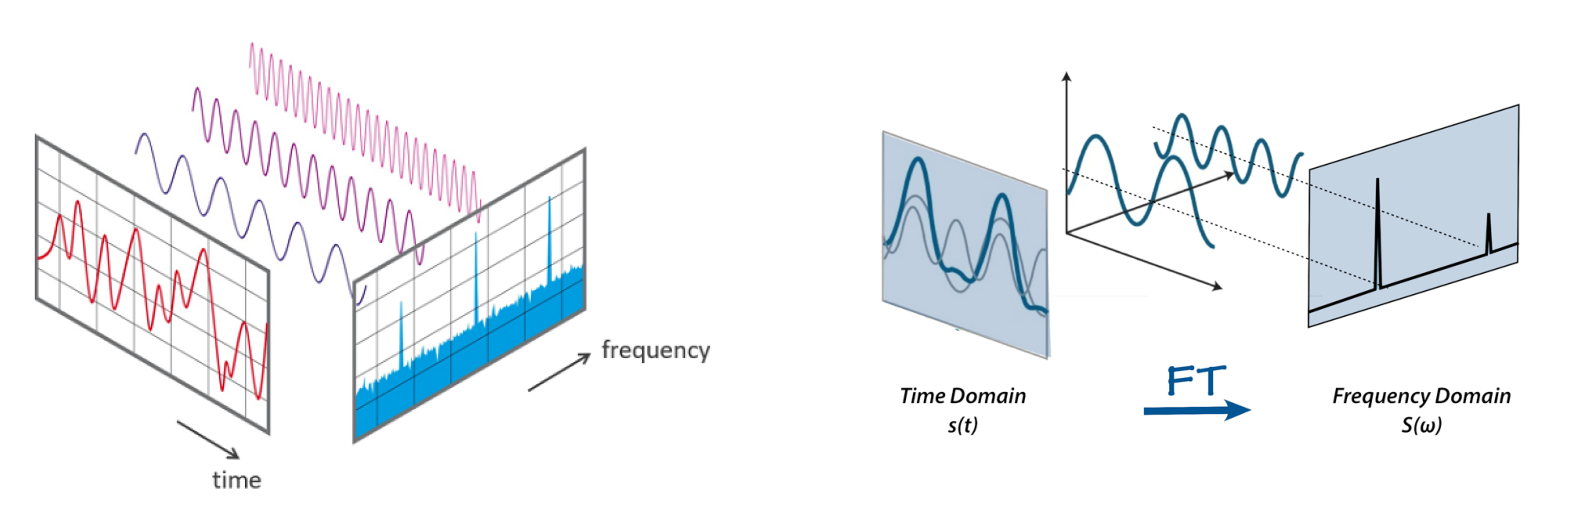

In [32]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(plt.imread('data/1.png'))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(plt.imread('data/2.webp'))
plt.axis('off')
plt.show()

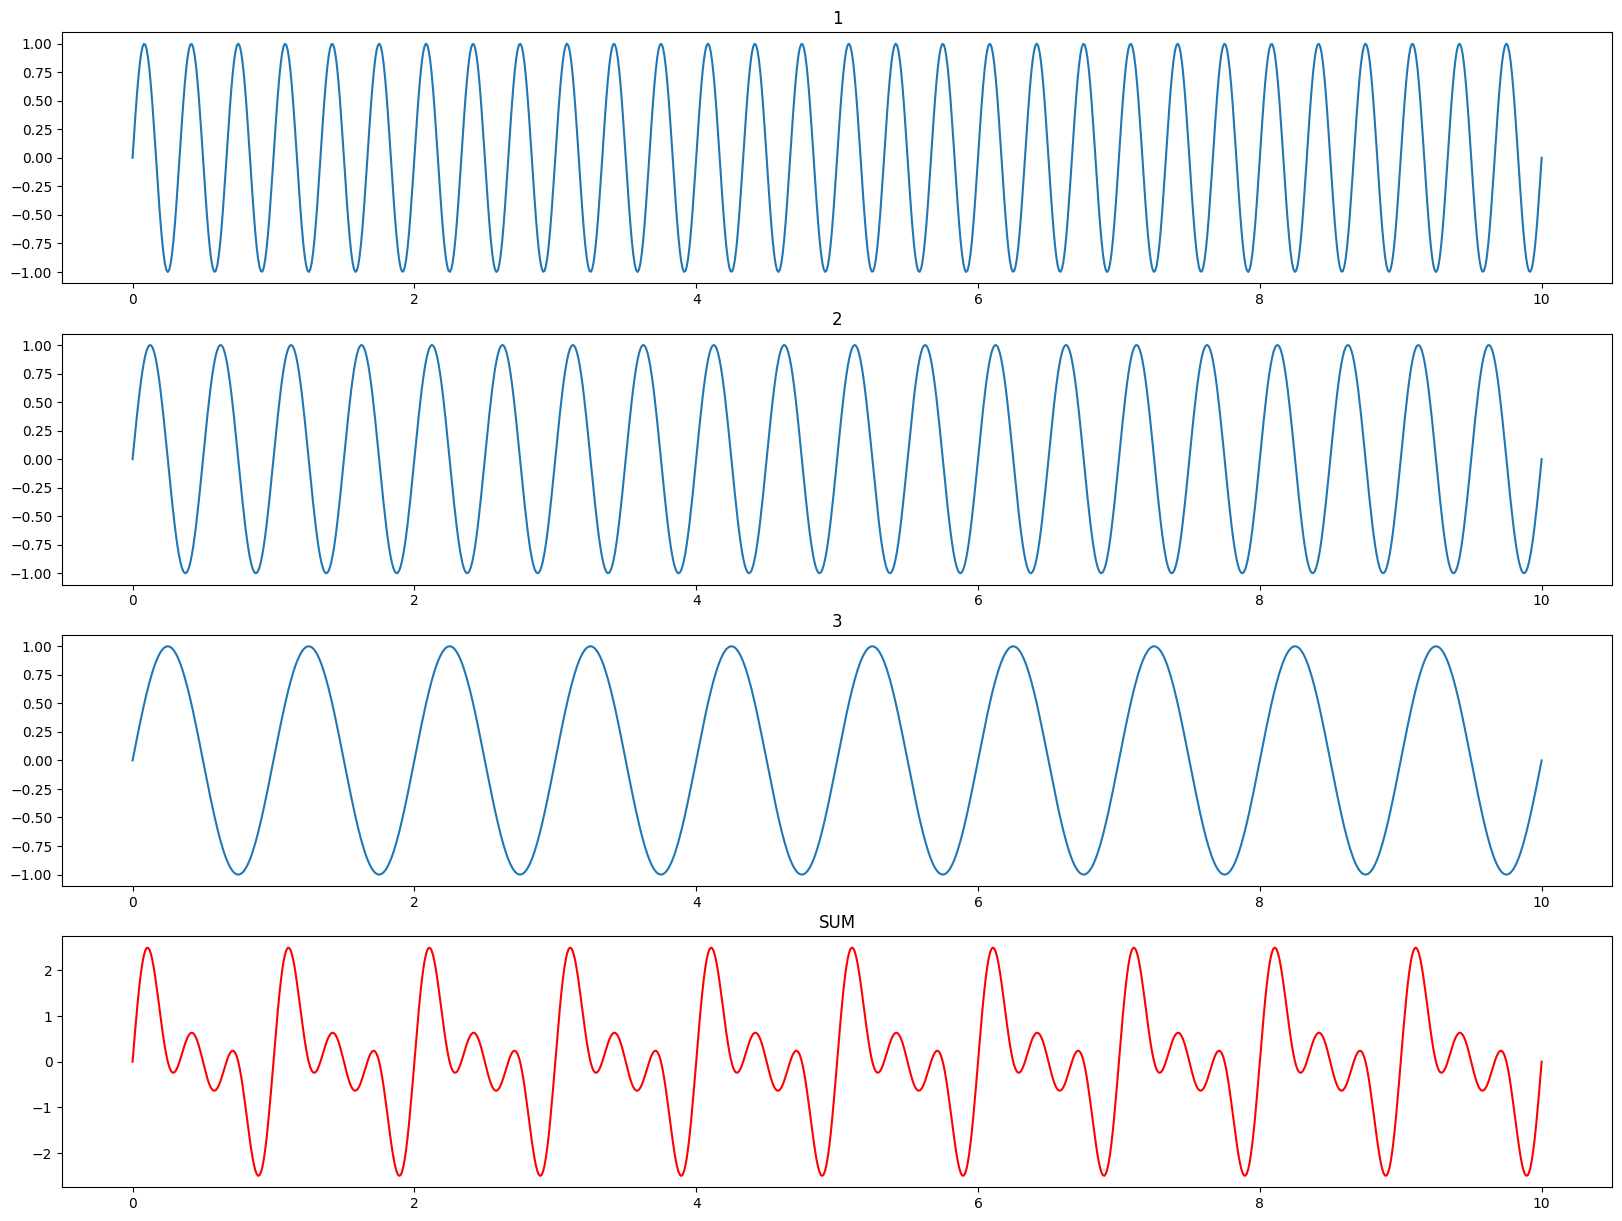

In [33]:
time = np.linspace(0, 10, 1000)
r, c = 4, 1

sin = np.sin(2 * np.pi * (1 * time))
sin2 = np.sin(2 * np.pi * (2 * time))
sin3 = np.sin(2 * np.pi * (3 * time))

sum_signal = sin + sin2 + sin3

plt.figure(figsize=(20, 15))

plt.subplot(r, c, 1)
plt.plot(time, sin3)
plt.title('1')

plt.subplot(r, c, 2)
plt.plot(time, sin2)
plt.title('2')

plt.subplot(r, c, 3)
plt.plot(time, sin)
plt.title('3')

plt.subplot(r, c, 4)
plt.plot(time, sum_signal, color="r")
plt.title('SUM')

plt.show()

# Spectrogram

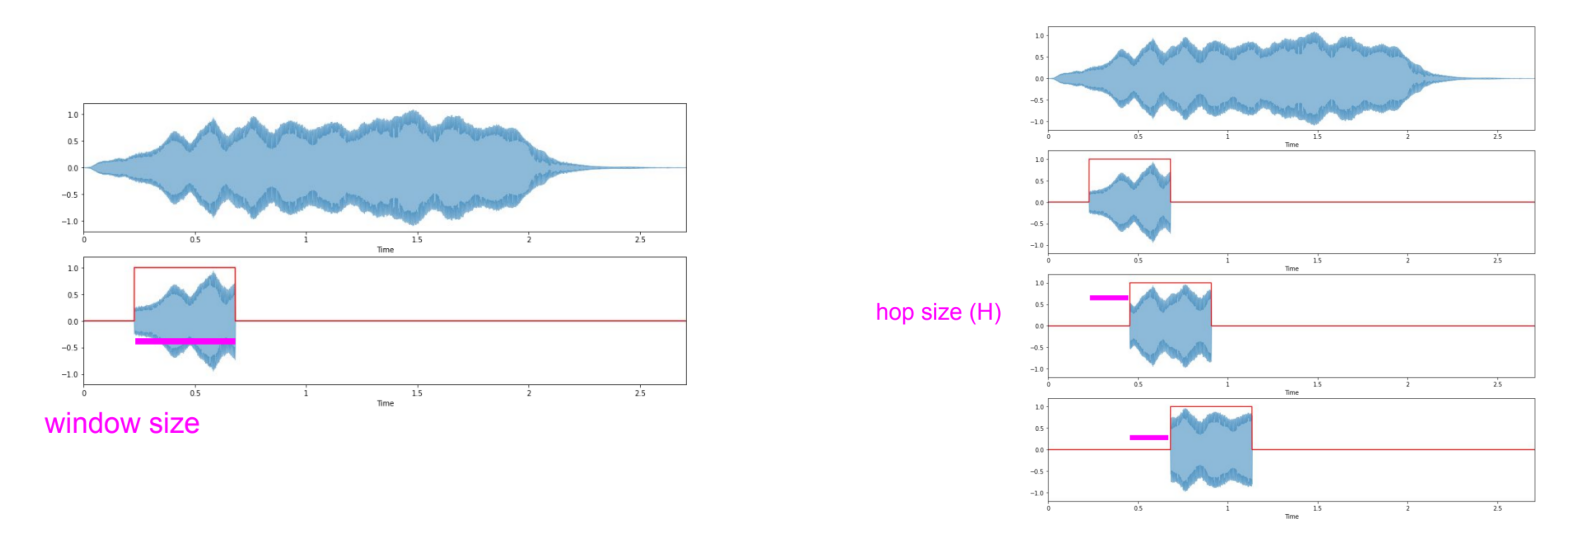

In [34]:
plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.imshow(plt.imread('data/3.png'))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(plt.imread('data/4.png'))
plt.axis('off')
plt.show()

In [35]:
FRAME_SIZE = 2048
HOP_SIZE = 512

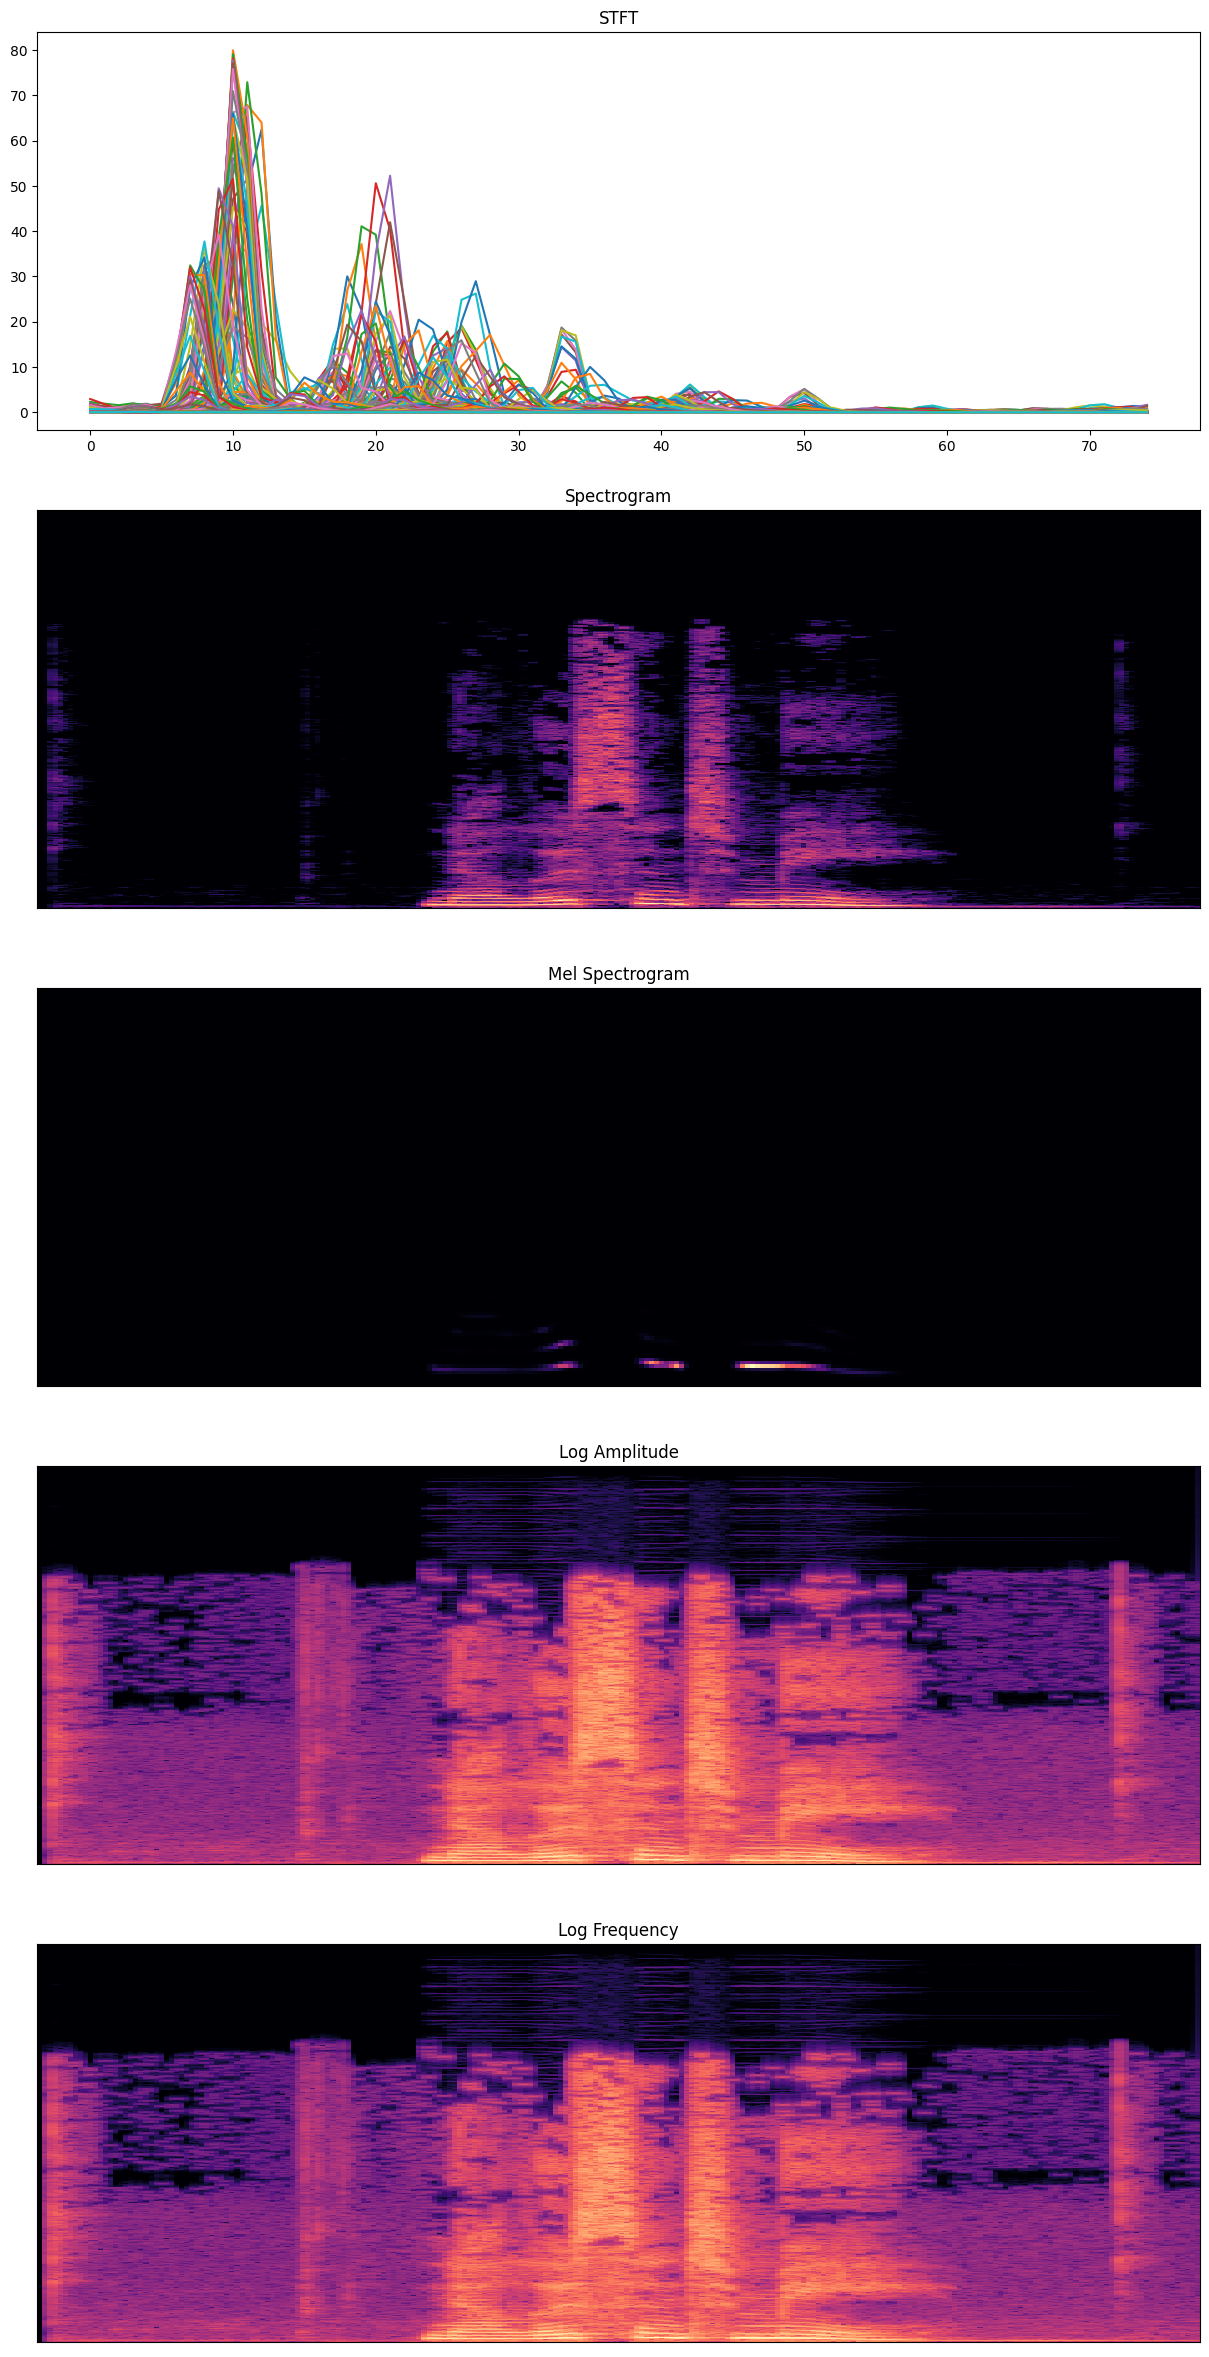

In [45]:
fig = plt.figure(figsize=(15, 30))
r, c = 5, 1

fig.add_subplot(r, c, 1)
stft = librosa.stft(signal, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
stft = np.abs(stft)
plt.plot(stft[:75])
plt.title('STFT')

fig.add_subplot(r, c, 2)
stft_db = librosa.amplitude_to_db(stft, ref=np.max)
librosa.display.specshow(stft_db)
plt.title('Spectrogram')

fig.add_subplot(r, c, 3)
'''
    Studies have shown that humans do not perceive frequencies on a linear scale. We are better at detecting differences
    in lower frequencies than higher frequencies. For example, we can easily tell the difference between 500 and 1000 Hz,
    but we will hardly be able to tell a difference between 10,000 and 10,500 Hz, even though the distance between
    the two pairs are the same
    A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale
'''
mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr)
librosa.display.specshow(mel_spec)
plt.title('Mel Spectrogram')

fig.add_subplot(r, c, 4)
log_stft = librosa.power_to_db(stft)
librosa.display.specshow(log_stft)
plt.title('Log Amplitude')

fig.add_subplot(r, c, 5)
librosa.display.specshow(log_stft)
plt.title('Log Frequency')

plt.show()